In [1]:
import os, sys
path = os.chdir(os.getcwd()+"/..")
print(path)
sys.path.append(path)    #give here the path to the folder containing the package,default does not work!!

import numpy as np
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

from ensembler.system import system
from ensembler.potentials.OneD import harmonicOsc
from ensembler.potentials.ND import envelopedPotential

from ensembler.integrator import monteCarloIntegrator, metropolisMonteCarloIntegrator, positionVerletIntegrator, velocityVerletIntegrator
from ensembler.conditions.thermostats import berendsenThermostate
from ensembler.visualisation.plotSimulations import static_sim_plots
from ensembler.visualisation.animationSimulation import animation_trajectory


None


# UNDER DEVELOPMENT

# Plots of Simulations

## Newtonian Integrator

c:\Users\benja\OneDrive - ETHZ\PhD\Code\Ensembler_native_github\ensembler\conditions\thermostats.py:70: RuntimeWarning: invalid value encountered in double_scalars
  self._lambda = (1+(self.dt/self.tau)*((self.system.temperature/T_t)-1))**0.5
C:\Users\benja\Anaconda3\envs\EnsemblerN\lib\site-packages\matplotlib\cbook\__init__.py:1316: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <= hival]
C:\Users\benja\Anaconda3\envs\EnsemblerN\lib\site-packages\matplotlib\cbook\__init__.py:1323: RuntimeWarning: invalid value encountered in greater_equal
  wisklo = x[x >= loval]
C:\Users\benja\Anaconda3\envs\EnsemblerN\lib\site-packages\matplotlib\cbook\__init__.py:1331: RuntimeWarning: invalid value encountered in less
  x[x < stats['whislo']],
C:\Users\benja\Anaconda3\envs\EnsemblerN\lib\site-packages\matplotlib\cbook\__init__.py:1332: RuntimeWarning: invalid value encountered in greater
  x[x > stats['whishi']],
init_state State(position=-10, temperature=298.0, totEnergy=5

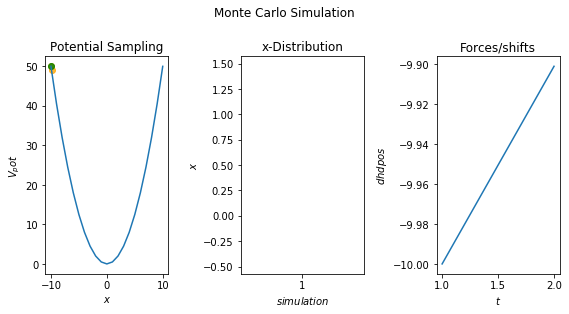

In [2]:
#Simple Verlet integration simulation:
#UNDER DEVELOPMENT!
# The temperature is not constant!!!
#settings
sim_steps = 100
x_min, x_max = (-10, 10)
max_step_size = 2.0
pot=harmonicOsc()
thermo = berendsenThermostate(tau=3,dt=0.01)
integrator = positionVerletIntegrator(dt=0.01)#maxStepSize=max_step_size,
sys=system(potential=pot, integrator=integrator, conditions=[thermo], position=-10)

#simulate
cur_state = sys.simulate(sim_steps, withdrawTraj=True, initSystem=True)
print("init_state", sys.trajectory[0], "\n")
print("last_state: ",  sys.trajectory[-1], "\n")
print("Trajectory length: ",len(sys.trajectory))

#plot
static_sim_plots(sys, title="Monte Carlo Simulation", x_range=list(range(-10,11)))

# Animations of Simulations

INTEGRATOR: current forces	  -10.0
INTEGRATOR: current Velocities	  0.7551382711220715
INTEGRATOR: current_position	  -10
INTEGRATOR: newVel	  10.755138271122071
INTEGRATOR: newPosition	  0.7551382711220711


INTEGRATOR: current forces	  0.7551382711220711
INTEGRATOR: current Velocities	  10.755138271122071
INTEGRATOR: current_position	  0.7551382711220711
INTEGRATOR: newVel	  10.0
INTEGRATOR: newPosition	  10.755138271122071


INTEGRATOR: current forces	  10.755138271122071
INTEGRATOR: current Velocities	  10.0
INTEGRATOR: current_position	  10.755138271122071
INTEGRATOR: newVel	  -0.7551382711220711
INTEGRATOR: newPosition	  10.0


INTEGRATOR: current forces	  10.0
INTEGRATOR: current Velocities	  -0.7551382711220711
INTEGRATOR: current_position	  10.0
INTEGRATOR: newVel	  -10.755138271122071
INTEGRATOR: newPosition	  -0.7551382711220711


INTEGRATOR: current forces	  -0.7551382711220711
INTEGRATOR: current Velocities	  -10.755138271122071
INTEGRATOR: current_position	  -0.7551382711

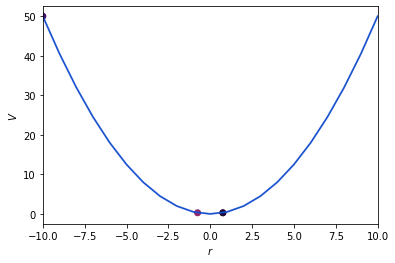

In [3]:
#Simple Verlet integration simulation:
#UNDER DEVELOPMENT!The temperature is not constant!!!
#settings
sim_steps = 10
x_min, x_max = (-10, 10)
max_step_size = 2.0
pot=harmonicOsc()
#thermo = berendsenThermostate(tau=3, dt=1, MConstraintsDims=-1)
#thermo.verbose = True
integrator = positionVerletIntegrator(dt=1)#maxStepSize=max_step_size,
integrator.verbose = True
sys=system(potential=pot, integrator=integrator,  position=-10)

#simulate
cur_state = sys.simulate(sim_steps, withdrawTraj=True, initSystem=True)
print("init_state", sys.trajectory[0], "\n")
print("last_state: ",  sys.trajectory[-1], "\n")
print("Trajectory length: ",len(sys.trajectory))

#animation
ani, out_path = animation_trajectory(sys, [x_min, x_max])

import tempfile
os.chdir(tempfile.gettempdir())
from IPython.display import HTML
HTML(ani.to_jshtml())

In [19]:
#Simple Verlet integration simulation:
#UNDER DEVELOPMENT!The temperature is not constant!!!
#settings
sim_steps = 100
x_min, x_max = (-10, 10)
max_step_size = 2.0
pot=harmonicOsc()
thermo = berendsenThermostate(tau=20, dt=1)
#thermo.verbose = True
integrator = velocityVerletIntegrator(dt=1)#maxStepSize=max_step_size,
#integrator.verbose = True
sys=system(potential=pot, integrator=integrator, conditions=[thermo], position=-5, temperature=0)

#simulate
cur_state = sys.simulate(sim_steps, withdrawTraj=True, initSystem=True)
print("init_state", sys.trajectory[0], "\n")
print("last_state: ",  sys.trajectory[-1], "\n")
print("Trajectory length: ",len(sys.trajectory))

#animation
ani, out_path = animation_trajectory(sys, [x_min, x_max])

import tempfile
os.chdir(tempfile.gettempdir())
from IPython.display import HTML
HTML(ani.to_jshtml())

Ensembler.src.potentials._baseclassesin _set_singlePos_mode  1


TypeError: can only concatenate str (not "type") to str